//Use https://github.com/edge-ml/python to download your data set

In [34]:
from edgeml import DatasetReceiver
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)
project = DatasetReceiver("https://app.edge-ml.org", "3220e00cec76db63f6bd5f6e4b3c1f4f")

In [35]:
project.datasets[0].loadData()
project.datasets[0].data.head()

,time,accX,accY,accZ,acc
0,2023-09-15 15:11:03.441,-0.66,0.22,-1.22,Walk
1,2023-09-15 15:11:03.458,-1.21,0.24,-0.83,Walk
2,2023-09-15 15:11:03.475,-1.18,0.71,-0.82,Walk
3,2023-09-15 15:11:03.491,-0.27,0.93,0.04,Walk
4,2023-09-15 15:11:03.508,0.75,0.66,0.49,Walk


In [36]:
#join all datasets into a single dataframe
df = pd.DataFrame()
for id, dataset in enumerate(project.datasets):
        dataset.loadData()
        data = dataset.data
        if data is not None:
                data['group'] = id
                df = df.append(data, ignore_index=True)

#Rename acc column with target 
df = df.rename(columns={'acc': 'target'})

#Drop empty or empty string target values
df = df.dropna(subset=['target'])
df = df[df.target != '']

KeyboardInterrupt: 

In [ ]:
df.describe()

,accX,accY,accZ,group
count,44593.000000,44664.000000,44638.000000,45288.000000
mean,-0.705384,0.619832,-0.384592,10.750044
std,3.803392,3.462276,2.329234,6.557101
min,-56.970001,-28.290001,-21.240000,0.000000
25%,-1.870000,-1.090000,-1.570000,5.000000
50%,-0.220000,0.240000,-0.120000,12.000000
75%,0.850000,1.810000,1.000000,16.000000
max,24.000000,40.950001,18.510000,22.000000


In [ ]:
# clean df
df = df.dropna()
df = df.drop_duplicates()
df.describe()

,accX,accY,accZ,group
count,27163.000000,27163.000000,27163.000000,27163.000000
mean,-0.822913,0.772199,-0.498531,10.291941
std,4.469182,4.019788,2.451602,6.264907
min,-56.970001,-28.290001,-21.240000,0.000000
25%,-2.500000,-1.260000,-1.860000,5.000000
50%,-0.250000,0.170000,-0.230000,10.000000
75%,1.205000,2.380000,0.910000,15.000000
max,24.000000,40.950001,18.510000,22.000000


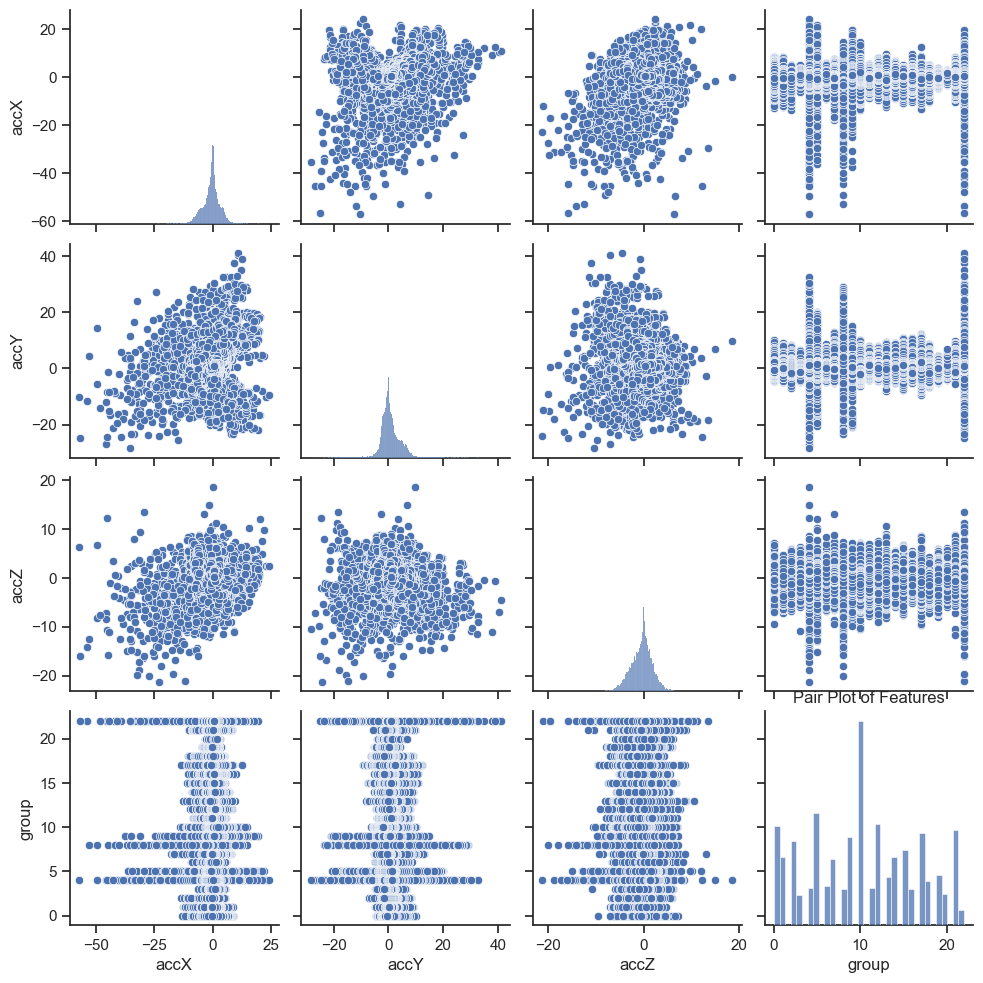

In [ ]:
sns.set(style="ticks")
sns.pairplot(df)
plt.title('Pair Plot of Features')
plt.show()


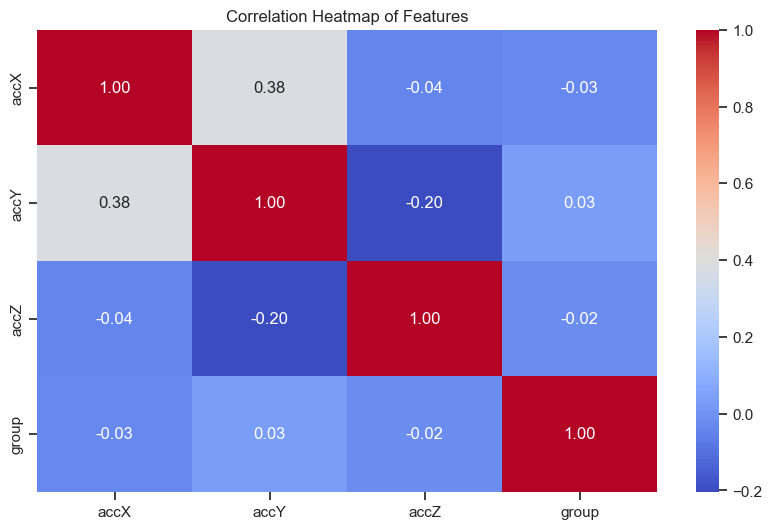

In [ ]:
plt.figure(figsize=(10, 6))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Heatmap of Features')
plt.show()


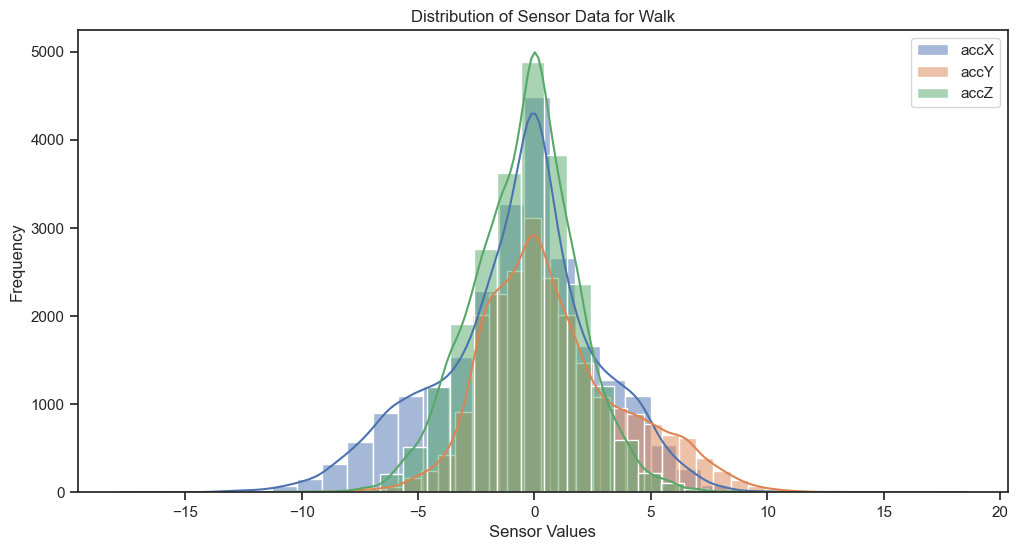

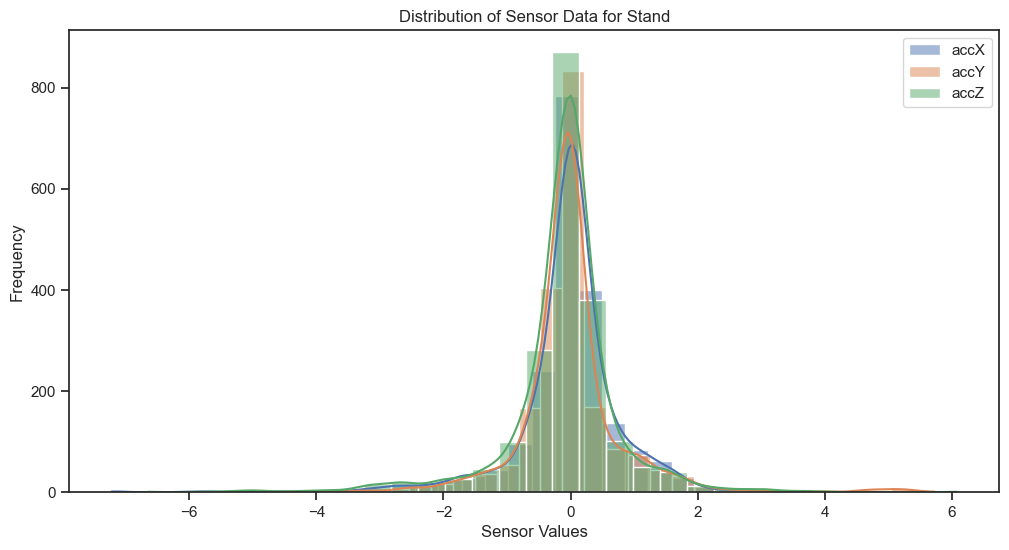

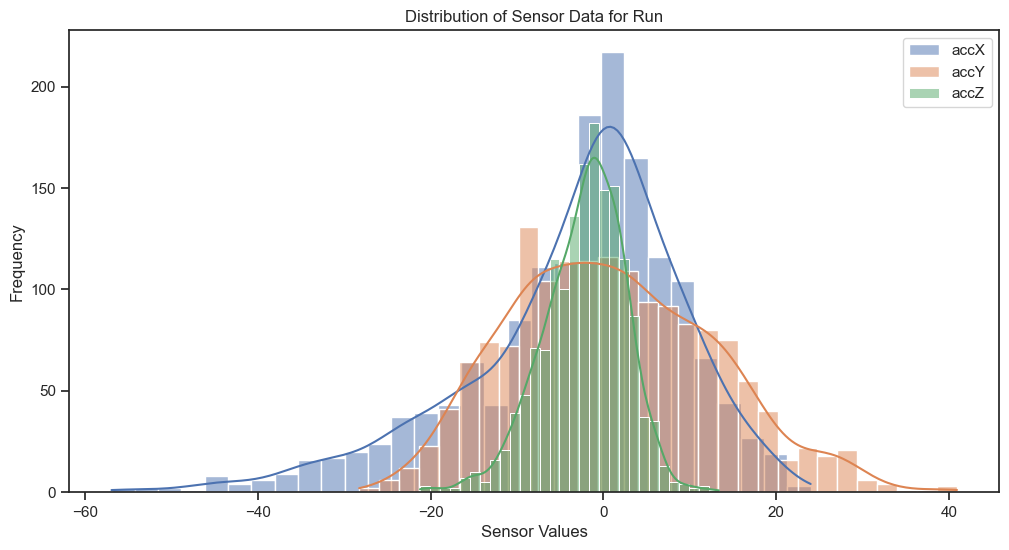

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a DataFrame 'df' with the relevant columns

# Filter the data for each target class
target_classes = ['Walk', 'Stand', 'Run']

for target_class in target_classes:
    target_data = df[df['target'] == target_class]
    
    if not target_data.empty:
        plt.figure(figsize=(12, 6))
        sns.histplot(data=target_data, x='accX', bins=30, label='accX', kde=True)
        sns.histplot(data=target_data, x='accY', bins=30, label='accY', kde=True)
        sns.histplot(data=target_data, x='accZ', bins=30, label='accZ', kde=True)
        plt.xlabel('Sensor Values')
        plt.ylabel('Frequency')
        plt.title(f'Distribution of Sensor Data for {target_class}')
        plt.legend()
        plt.show()
    else:
        print(f"No data found for target class {target_class}")



In [ ]:
import pandas as pd

window_size = 10

# Create a new DataFrame to store the features
window_df = pd.DataFrame()

# Define the columns for which you want to calculate mean and variance
columns_to_process = ["accX", "accY", "accZ"]

# Loop through each column and calculate mean and variance for the windows
for column in columns_to_process:
    # Calculate the rolling mean for the current column
    mean_col = df[column].rolling(window=window_size).mean()    
    # Calculate the rolling variance for the current column
    var_col = df[column].rolling(window=window_size).var()

    # Add the mean and variance as features to the features DataFrame
    window_df[f"{column}_mean"] = mean_col
    window_df[f"{column}_variance"] = var_col

window_df['target'] = df['target']
window_df['group'] = df['group']

window_df.dropna(inplace=True)

window_df.head()


,accX_mean,accX_variance,accY_mean,accY_variance,accZ_mean,accZ_variance,target,group
10,-0.106,0.579138,0.476,0.079093,-0.120,0.388422,Walk,0
11,-0.118,0.595351,0.405,0.169894,-0.096,0.335516,Walk,0
12,-0.058,0.485751,0.329,0.255521,-0.116,0.372138,Walk,0
13,0.049,0.333454,0.216,0.287538,-0.141,0.417499,Walk,0
14,0.107,0.325979,0.108,0.232818,-0.322,0.672307,Walk,0


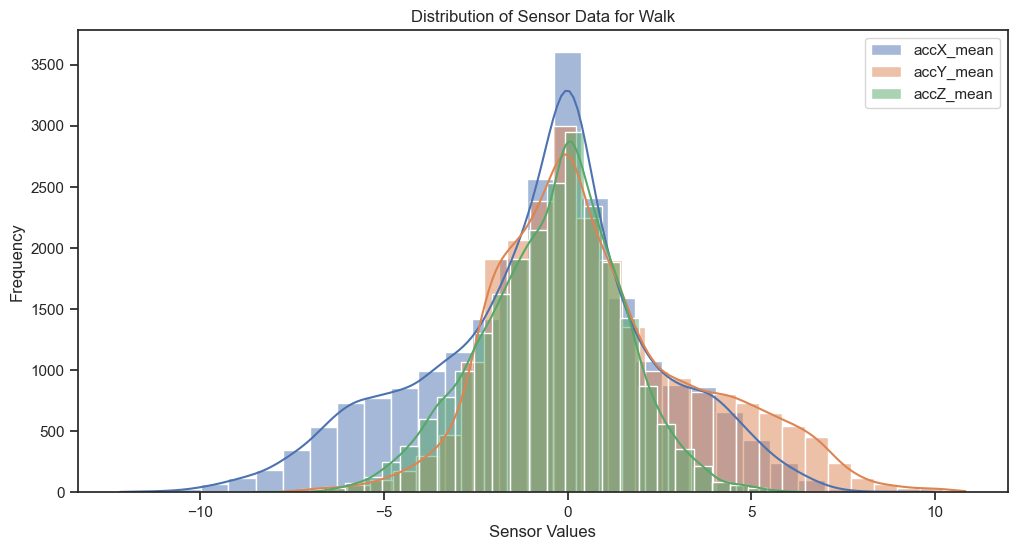

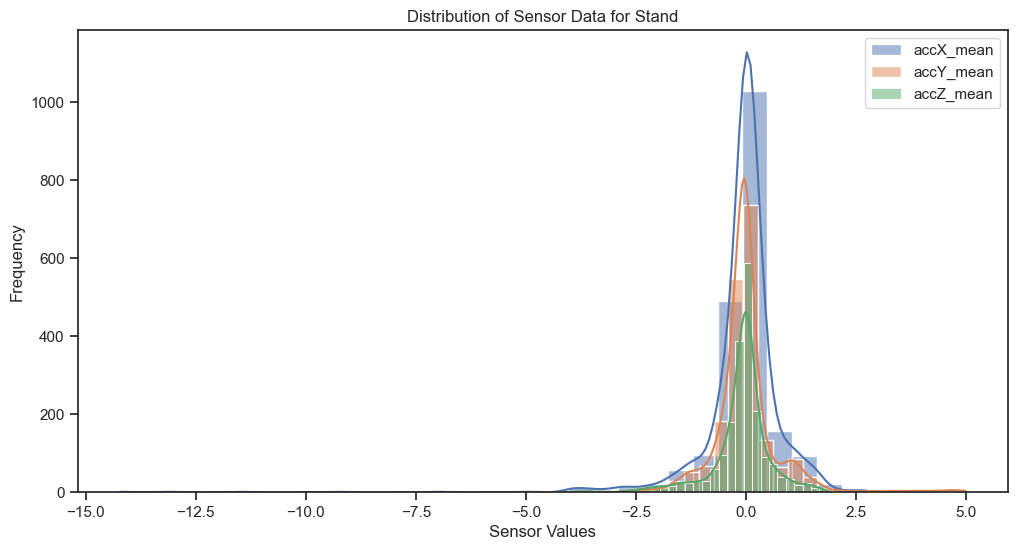

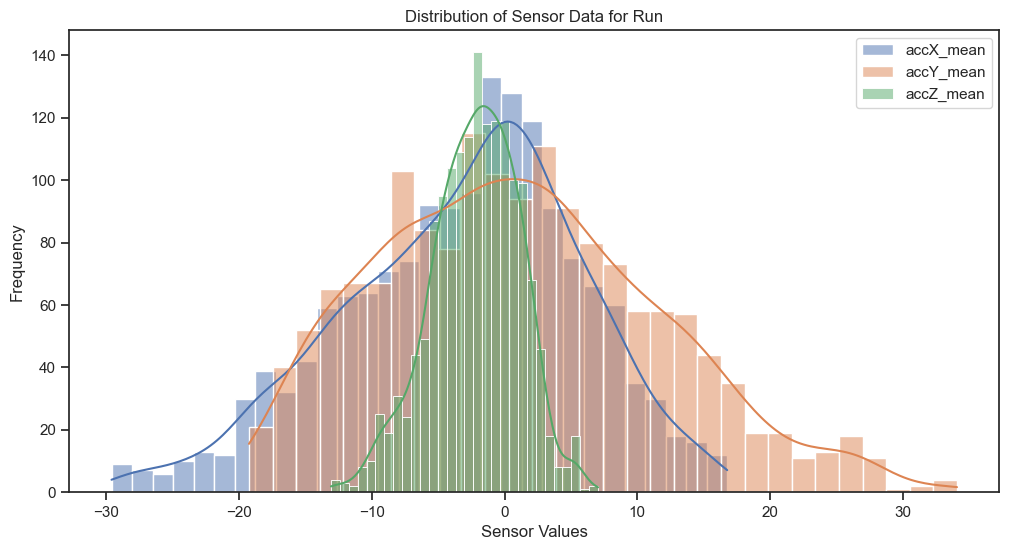

In [ ]:
for target_class in target_classes:
    target_data = window_df[window_df['target'] == target_class]
    
    if not target_data.empty:
        plt.figure(figsize=(12, 6))
        sns.histplot(data=target_data, x='accX_mean', bins=30, label='accX_mean', kde=True)
        sns.histplot(data=target_data, x='accY_mean', bins=30, label='accY_mean', kde=True)
        sns.histplot(data=target_data, x='accZ_mean', bins=30, label='accZ_mean', kde=True)
        plt.xlabel('Sensor Values')
        plt.ylabel('Frequency')
        plt.title(f'Distribution of Sensor Data for {target_class}')
        plt.legend()
        plt.show()
    else:
        print(f"No data found for target class {target_class}")

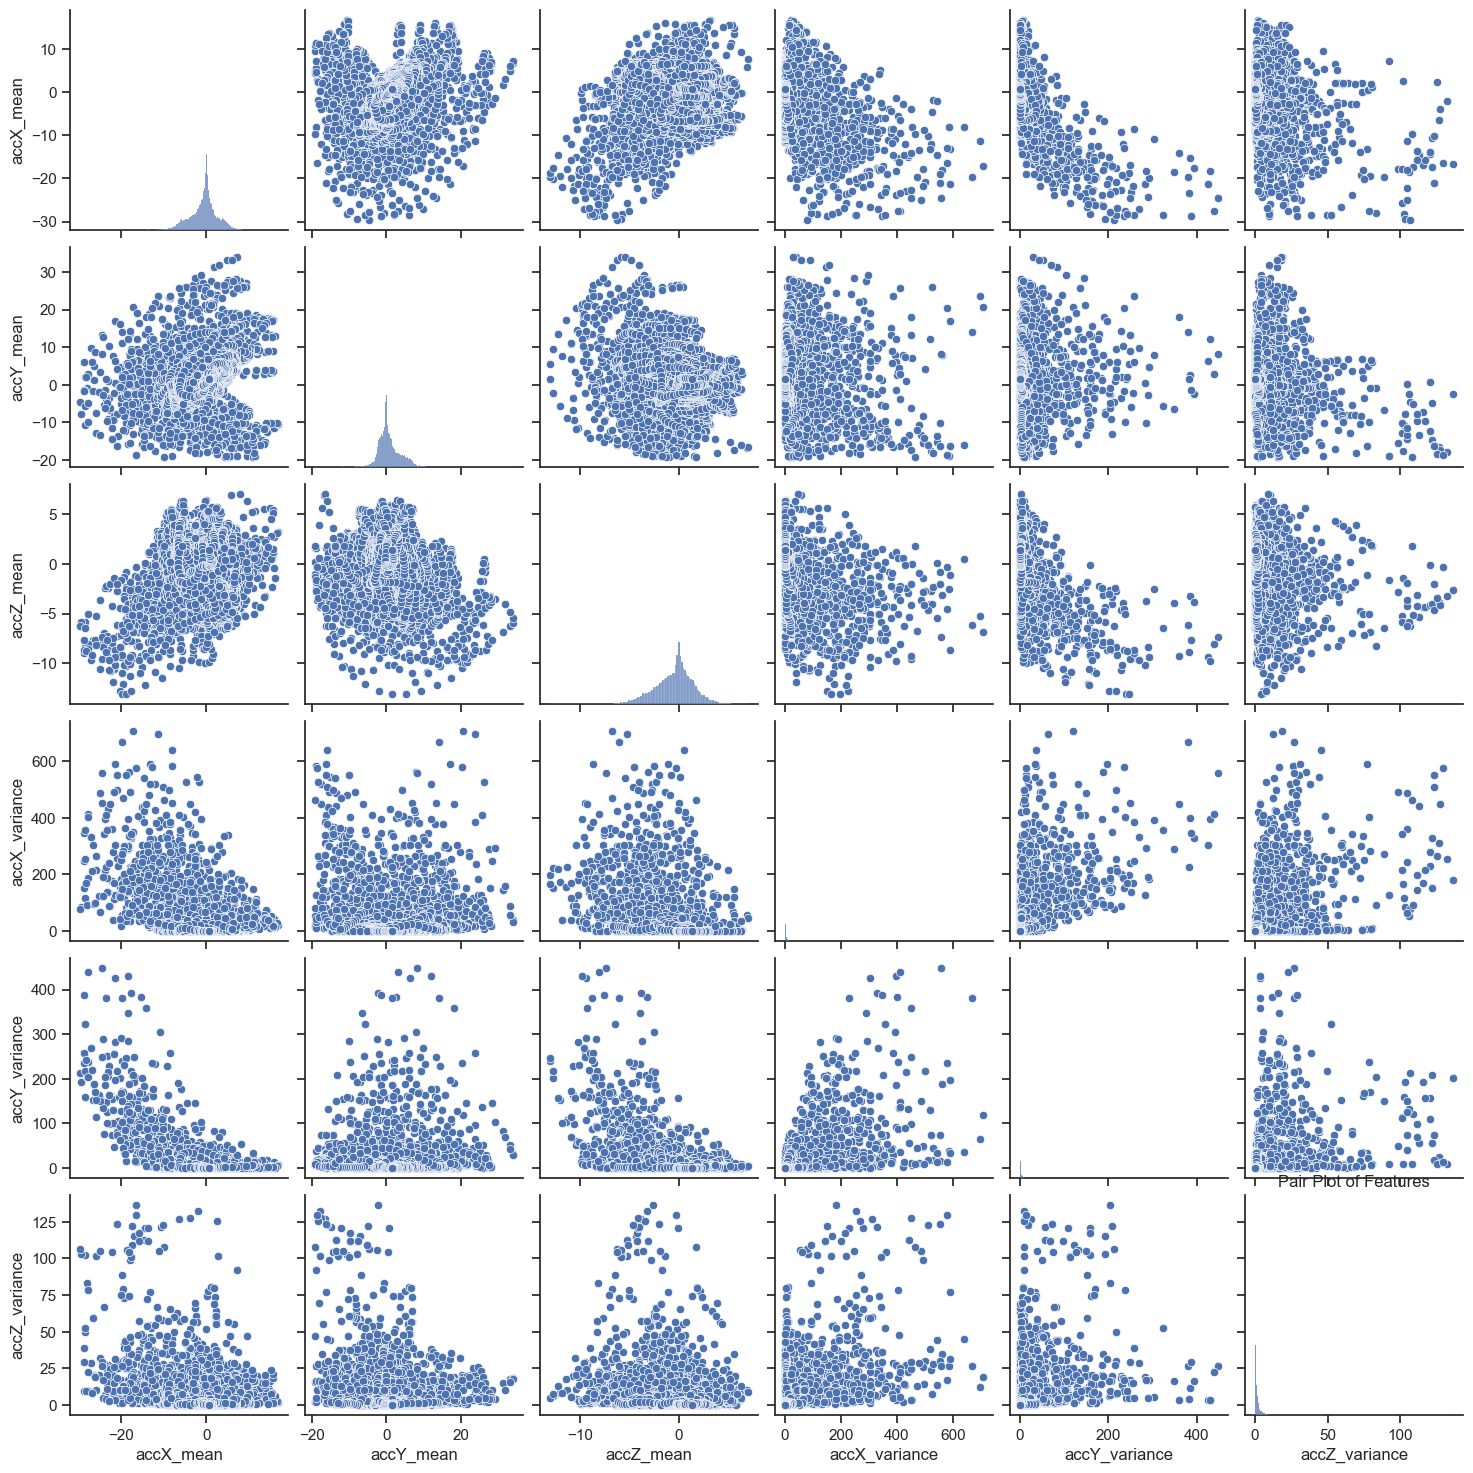

In [ ]:
sns.set(style="ticks")
sns.pairplot(window_df[['accX_mean', 'accY_mean', 'accZ_mean', 'accX_variance', 'accY_variance', 'accZ_variance']])
plt.title('Pair Plot of Features')
plt.show()


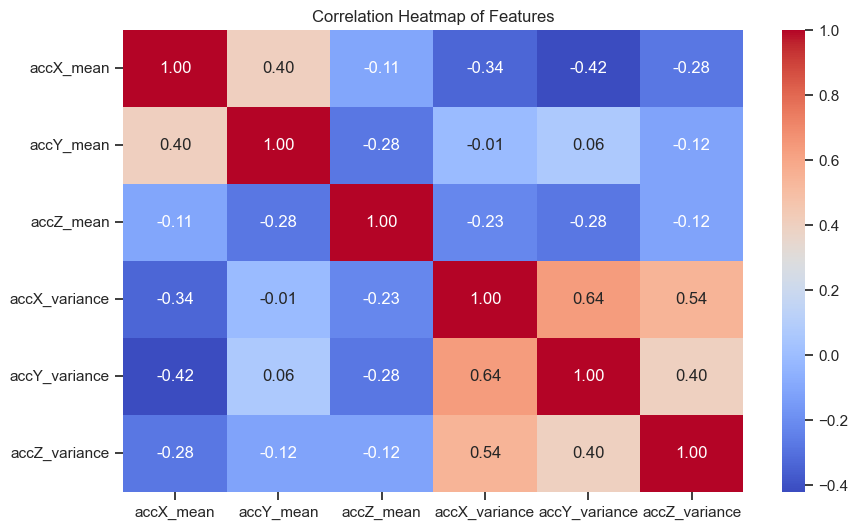

In [ ]:
plt.figure(figsize=(10, 6))
correlation_matrix = window_df[['accX_mean', 'accY_mean', 'accZ_mean', 'accX_variance', 'accY_variance', 'accZ_variance']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Heatmap of Features')
plt.show()


In [ ]:
window_df.head()

,accX_mean,accX_variance,accY_mean,accY_variance,accZ_mean,accZ_variance,target,group
10,-0.106,0.579138,0.476,0.079093,-0.120,0.388422,Walk,0
11,-0.118,0.595351,0.405,0.169894,-0.096,0.335516,Walk,0
12,-0.058,0.485751,0.329,0.255521,-0.116,0.372138,Walk,0
13,0.049,0.333454,0.216,0.287538,-0.141,0.417499,Walk,0
14,0.107,0.325979,0.108,0.232818,-0.322,0.672307,Walk,0


In [ ]:
# Normalize the data
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()
window_df[['accX_mean', 'accY_mean', 'accZ_mean', 'accX_variance', 'accY_variance', 'accZ_variance']] = Scaler.fit_transform(window_df[['accX_mean', 'accY_mean', 'accZ_mean', 'accX_variance', 'accY_variance', 'accZ_variance']])
window_df.head()

,accX_mean,accX_variance,accY_mean,accY_variance,accZ_mean,accZ_variance,target,group
10,0.194598,-0.188886,-0.080866,-0.187516,0.189339,-0.301782,Walk,0
11,0.191342,-0.188417,-0.100254,-0.181800,0.201334,-0.310442,Walk,0
12,0.207621,-0.191589,-0.121007,-0.176410,0.191338,-0.304447,Walk,0
13,0.236653,-0.195997,-0.151863,-0.174395,0.178843,-0.297022,Walk,0
14,0.252389,-0.196213,-0.181354,-0.177840,0.088375,-0.255309,Walk,0


Excercise 4

a. Do a leave-one-subject out test train split, e.g. using skleanr: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.LeaveOneGroupOut.html
b. Train different classifiers like those used here: https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html and compare accuracy, precission, recall, F1-Score
c. Compare leave one subject out against simple 10-fold crossvalidation results of best models
d. Select a feature subset you believe is good based on the last excercise and compare best models
e. Perform a recursive https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html on models that support

In [ ]:
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from collections import Counter

label_encoder = LabelEncoder()

X = window_df.drop(columns=['target'])
y = label_encoder.fit_transform(window_df['target'])


print("Class distribution before oversampling:", Counter(window_df['target']))

# Initialize SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Apply SMOTE to oversample the minority classes
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the class distribution after oversampling
print("Class distribution after oversampling:", Counter(y_resampled))

label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Mapping:", label_mapping)
y_resampled

Class distribution before oversampling: Counter({'Walk': 23552, 'Stand': 2009, 'Run': 1593})
Class distribution after oversampling: Counter({2: 23552, 1: 23552, 0: 23552})
Label Mapping: {'Run': 0, 'Stand': 1, 'Walk': 2}


array([2, 2, 2, ..., 1, 1, 1])

In [ ]:
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Define a list of classifiers
classifiers = [
    ("K-Nearest Neighbor", KNeighborsClassifier()),
    ("Naïve Bayes", GaussianNB()),
    ("Decision Tree", DecisionTreeClassifier()),
    ("Support Vector Machines", SVC()),
    ("Random Forests", RandomForestClassifier(n_estimators=100))
]

# Initialize LeaveOneGroupOut
logo = LeaveOneGroupOut()

# Initialize dictionaries to accumulate metrics for each classifier
metrics = {classifier_name: {'accuracy': [], 'precision': [], 'recall': [], 'f1_score': []} for classifier_name, _ in classifiers}

#TODO: What would be a good group?
groups = df['group']

# Iterate through the LeaveOneGroupOut splits
for train_index, test_index in logo.split(X_resampled, y_resampled, groups=groups):
    X_train, X_test = X_resampled.iloc[train_index], X_resampled.iloc[test_index]
    y_train, y_test = y_resampled[train_index], y_resampled[test_index]
    
    # Iterate through each classifier
    for classifier_name, classifier in classifiers:
        # Initialize and train the classifier
        classifier.fit(X_train, y_train)
    
        # Make predictions on the test set
        y_pred = classifier.predict(X_test)
    
        # Calculate metrics and store them
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
        recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
        f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
        
        metrics[classifier_name]['accuracy'].append(accuracy)
        metrics[classifier_name]['precision'].append(precision)
        metrics[classifier_name]['recall'].append(recall)
        metrics[classifier_name]['f1_score'].append(f1)

# Print metrics for each classifier
for classifier_name, classifier_metrics in metrics.items():
    print(f"Metrics for {classifier_name}:")
    print(f"  Accuracy: {sum(classifier_metrics['accuracy']) / len(classifier_metrics['accuracy'])}")
    print(f"  Precision: {sum(classifier_metrics['precision']) / len(classifier_metrics['precision'])}")
    print(f"  Recall: {sum(classifier_metrics['recall']) / len(classifier_metrics['recall'])}")
    print(f"  F1-Score: {sum(classifier_metrics['f1_score']) / len(classifier_metrics['f1_score'])}")
    print()


KeyboardInterrupt: 

In [ ]:
import numpy as np
from sklearn.model_selection import KFold, cross_val_score

# Import your models, metrics, and dataset
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier  # Replace with your model imports
from sklearn.svm import SVC  # Replace with your model imports

classifiers = [
    ("K-Nearest Neighbor", KNeighborsClassifier()),
    ("Naïve Bayes", GaussianNB()),
    ("Decision Tree", DecisionTreeClassifier()),
    ("Support Vector Machines", SVC()),
    ("Random Forests", RandomForestClassifier(n_estimators=100))
]

# Initialize a KFold cross-validation object
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize dictionaries to accumulate metrics for each classifier
metrics = {classifier_name: {'accuracy': [], 'precision': [], 'recall': [], 'f1_score': []} for classifier_name, _ in classifiers}

# Iterate through the KFold splits
for train_index, test_index in kf.split(X, y):
    X_train, X_test = X_resampled.iloc[train_index], X_resampled.iloc[test_index]
    y_train, y_test = y_resampled[train_index], y_resampled[test_index]
    
    # Iterate through each classifier
    for classifier_name, classifier in classifiers:
        # Initialize and train the classifier
        classifier.fit(X_train, y_train)
    
        # Make predictions on the test set
        y_pred = classifier.predict(X_test)
    
        # Calculate metrics and store them
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
        recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
        f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
        
        metrics[classifier_name]['accuracy'].append(accuracy)
        metrics[classifier_name]['precision'].append(precision)
        metrics[classifier_name]['recall'].append(recall)
        metrics[classifier_name]['f1_score'].append(f1)

# Print metrics for each classifier
for classifier_name, classifier_metrics in metrics.items():
    print(f"Metrics for {classifier_name}:")
    print(f"  Accuracy: {np.mean(classifier_metrics['accuracy'])}")
    print(f"  Precision: {np.mean(classifier_metrics['precision'])}")
    print(f"  Recall: {np.mean(classifier_metrics['recall'])}")
    print(f"  F1-Score: {np.mean(classifier_metrics['f1_score'])}")
    print()

Metrics for K-Nearest Neighbor:
  Accuracy: 0.9828385774768984
  Precision: 0.983548542820803
  Recall: 0.9828385774768984
  F1-Score: 0.9830485967233041

Metrics for Naïve Bayes:
  Accuracy: 0.8424542239291343
  Precision: 0.900823647621446
  Recall: 0.8424542239291343
  F1-Score: 0.8627860920871641

Metrics for Decision Tree:
  Accuracy: 0.9777564504186363
  Precision: 0.9778426229737814
  Recall: 0.9777564504186363
  F1-Score: 0.9777812295674899

Metrics for Support Vector Machines:
  Accuracy: 0.90984774760847
  Precision: 0.8441156800702047
  Recall: 0.90984774760847
  F1-Score: 0.8738087564534818

Metrics for Random Forests:
  Accuracy: 0.9859688850194063
  Precision: 0.9859158821688089
  Recall: 0.9859688850194063
  F1-Score: 0.9856973585802786



In [ ]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR

'''
classifiers = [
    ("K-Nearest Neighbor", KNeighborsClassifier()),
    ("Naïve Bayes", GaussianNB()),
    ("Decision Tree", DecisionTreeClassifier()),
    ("Support Vector Machines", SVC()),
    ("Random Forests", RandomForestClassifier(n_estimators=500))
]

for classifier_name, model in classifiers:
    print(f"RFE for {classifier_name}:")

    rfe = RFE(model, n_features_to_select=3, step=1)

    rfe.fit(X_resampled, y_resampled)
    
    selected_features = rfe.support_
    ranking = rfe.ranking_
    
    # Print the selected features and their rankings
    print("Selected Features:", selected_features)
    print("Feature Rankings:", ranking)
    print()
estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=3, step=1)
selector = selector.fit(X_resampled, y_resampled)
print(selector.support_)
print(selector.ranking_)'''

a. choose a model you want to optimize and build your own Bayesian Optimizer using https://scikit-learn.org/stable/modules/generated/sklearn.gaussian_process.GaussianProcessRegressor.html

ModuleNotFoundError: No module named 'skopt'